# Relax Inc. Take Home Challenge

The goal is to look at take-home users and see who might be most likely to be a future adopted user.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
#Lets start with just loading the data and taking a look

user_data = pd.read_csv('./user_data/takehome_users.csv', encoding = 'latin-1')
user_engagement = pd.read_csv('./user_data/takehome_user_engagement.csv')

In [12]:
user_data.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,4/22/2014 3:53,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,11/15/2013 3:45,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,3/19/2013 23:14,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,5/21/2013 8:09,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,1/17/2013 10:14,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [13]:
user_engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [18]:
# drop name and email because we don't need that information

user_data.drop(['name','email'], inplace = True, axis = 1)

KeyError: "['name' 'email'] not found in axis"

In [19]:
user_data

,object_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,4/22/2014 3:53,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,11/15/2013 3:45,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,3/19/2013 23:14,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,5/21/2013 8:09,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,1/17/2013 10:14,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
...,...,...,...,...,...,...,...,...
11995,11996,9/6/2013 6:14,ORG_INVITE,1.378448e+09,0,0,89,8263.0
11996,11997,1/10/2013 18:28,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN
11997,11998,4/27/2014 12:45,GUEST_INVITE,1.398603e+09,1,1,83,8074.0
11998,11999,5/31/2012 11:55,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN


I think a good approach would be to seperate out the data into two groups. Ones that are our adopted user and one group that isn't. We'll use the "takehome_user_engagement" table to look at that.

In [21]:
# Group by the users to find out which have counts of greater than 3

user_visits = user_engagement.groupby(by = 'user_id').sum()
user_visits

,visited
user_id,
1,1
2,14
3,1
4,1
5,1
...,...
11996,1
11997,1
11998,1


In [162]:
# break out into adopted
adopted = user_visits[user_visits['visited'] >= 3]
not_adopted = user_visits[user_visits['visited'] < 3]

In [163]:
not_adopted = not_adopted.reset_index()
not_adopted.head()

,user_id,visited
0,1,1
1,3,1
2,4,1
3,5,1
4,6,1


In [173]:
not_adopted['visited'].value_counts()

1    6235
2     340
Name: visited, dtype: int64

In [161]:
not_adopted.shape

(6575, 4)

In [45]:
adopted = adopted.reset_index()
adopted.head()

In [174]:
adopted['visited'].value_counts()

3      241
4      181
5      110
6       85
7       68
      ... 
213      1
395      1
509      1
159      1
255      1
Name: visited, Length: 400, dtype: int64

In [128]:
adopted.shape

(2248, 2)

Now that we have 2 groups we can filter our dataframe based on these 2 groups and assess their differences.

In [50]:
adopted_df = user_data[user_data['object_id'].isin(adopted['user_id'])]
adopted_df.head()

,object_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
1,2,11/15/2013 3:45,ORG_INVITE,1.396238e+09,0,0,1,316.0
9,10,1/16/2013 22:08,ORG_INVITE,1.401833e+09,1,1,318,4143.0
19,20,3/6/2014 11:46,SIGNUP,1.401364e+09,0,0,58,NaN
32,33,3/11/2014 6:29,GUEST_INVITE,1.401518e+09,0,0,401,79.0
41,42,11/11/2012 19:05,SIGNUP,1.401045e+09,1,0,235,NaN


In [51]:
not_adopted_df = user_data[user_data['object_id'].isin(not_adopted['user_id'])]
not_adopted_df.head()

,object_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,4/22/2014 3:53,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
2,3,3/19/2013 23:14,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,5/21/2013 8:09,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,1/17/2013 10:14,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
5,6,12/17/2013 3:37,GUEST_INVITE,1.387424e+09,0,0,197,11241.0


Lets try to visually asses what's going on with the data.

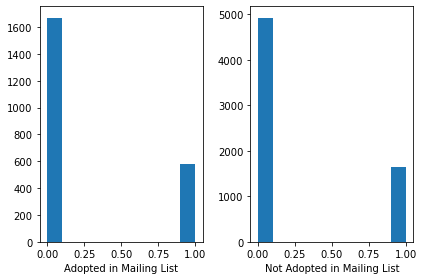

In [144]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, tight_layout = True)
ax[0].hist(adopted_df['opted_in_to_mailing_list']);
ax[1].hist(not_adopted_df['opted_in_to_mailing_list']);
ax[0].set_xlabel('Adopted in Mailing List');
ax[1].set_xlabel('Not Adopted in Mailing List');

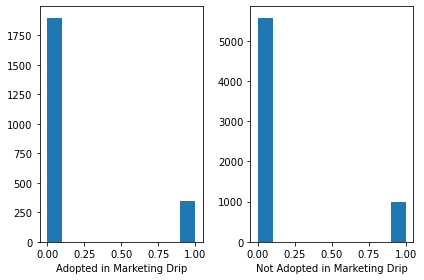

In [145]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, tight_layout = True)
ax[0].hist(adopted_df['enabled_for_marketing_drip']);
ax[1].hist(not_adopted_df['enabled_for_marketing_drip']);
ax[0].set_xlabel('Adopted in Marketing Drip');
ax[1].set_xlabel('Not Adopted in Marketing Drip');

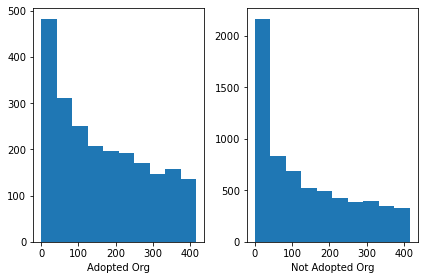

In [146]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, tight_layout = True)
ax[0].hist(adopted_df['org_id']);
ax[1].hist(not_adopted_df['org_id']);
ax[0].set_xlabel('Adopted Org');
ax[1].set_xlabel('Not Adopted Org');

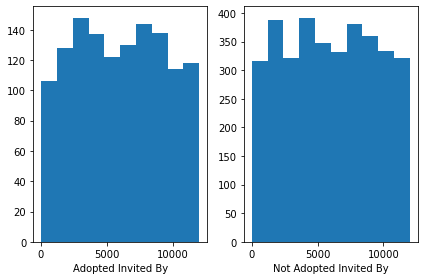

In [148]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, tight_layout = True)
ax[0].hist(adopted_df['invited_by_user_id']);
ax[1].hist(not_adopted_df['invited_by_user_id']);
ax[0].set_xlabel('Adopted Invited By');
ax[1].set_xlabel('Not Adopted Invited By');

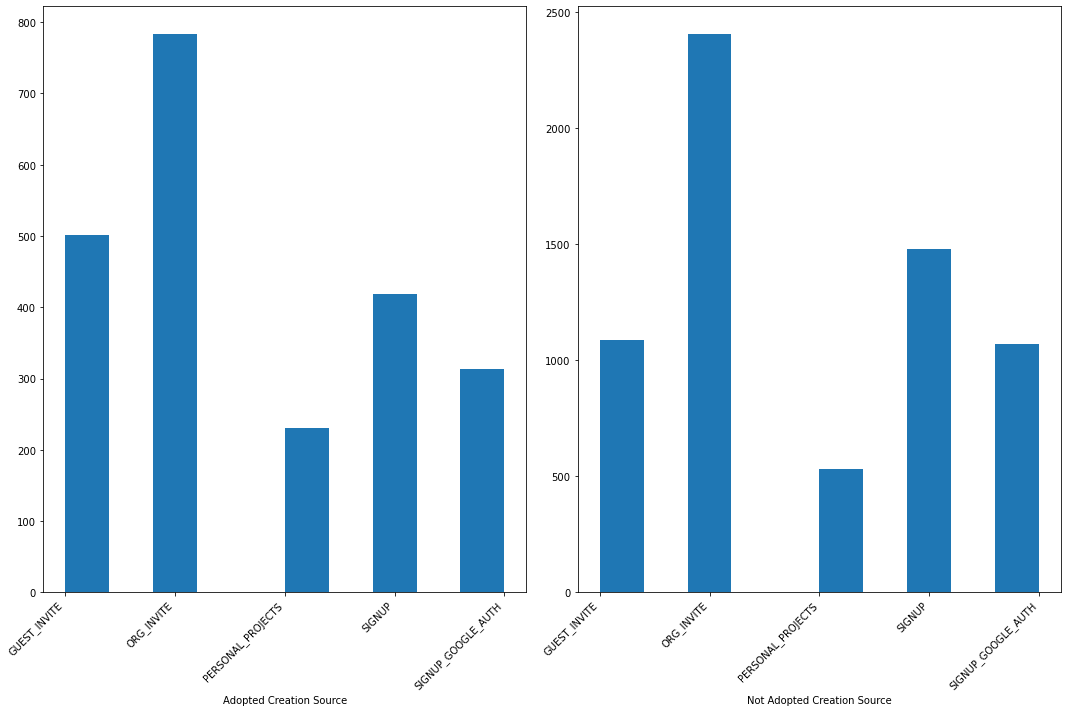

In [156]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, tight_layout = True, figsize = (15,10))
ax[0].hist(adopted_df['creation_source'].sort_values());
ax[1].hist(not_adopted_df['creation_source'].sort_values());
ax[0].set_xlabel('Adopted Creation Source');
ax[1].set_xlabel('Not Adopted Creation Source');
fig.autofmt_xdate(rotation=45);

## K-Prototypes

We will do a rudimentary K-prototypes to look at clusters. We're primarily interested in 2 groups, will adopt and will not adopt so lets keep it to 2 clusters and see what happens.

In [64]:
user_data_notime = user_data.drop(['creation_time', 'last_session_creation_time'], axis = 1)
user_data_notime

,object_id,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,GUEST_INVITE,1,0,11,10803.0
1,2,ORG_INVITE,0,0,1,316.0
2,3,ORG_INVITE,0,0,94,1525.0
3,4,GUEST_INVITE,0,0,1,5151.0
4,5,GUEST_INVITE,0,0,193,5240.0
...,...,...,...,...,...,...
11995,11996,ORG_INVITE,0,0,89,8263.0
11996,11997,SIGNUP_GOOGLE_AUTH,0,0,200,NaN
11997,11998,GUEST_INVITE,1,1,83,8074.0
11998,11999,PERSONAL_PROJECTS,0,0,6,NaN


In [72]:
# Lets binarize our invited_by_user_id and our org_id columns to see if belonging to an org or not matters

user_data_notime['invited_by_user_id'] = user_data_notime['invited_by_user_id'].replace(np.NaN, 0)
user_data_notime['invited_binarize'] = 0
user_data_notime.loc[user_data_notime['invited_by_user_id'] > 0, 'invited_binarize'] = 1

user_data_notime['org_binarize'] = 0
user_data_notime.loc[user_data_notime['org_id'] > 0, 'org_binarize'] = 1

user_data_notime.head()

,object_id,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,invited_binarize,org_binarize
0,1,GUEST_INVITE,1,0,11,10803.0,1,1
1,2,ORG_INVITE,0,0,1,316.0,1,1
2,3,ORG_INVITE,0,0,94,1525.0,1,1
3,4,GUEST_INVITE,0,0,1,5151.0,1,1
4,5,GUEST_INVITE,0,0,193,5240.0,1,1


In [73]:
# We can now drop org_id and invitation id

user_data_binarize = user_data_notime.drop(['org_id', 'invited_by_user_id'], axis = 1)
user_data_binarize.head()

,object_id,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,invited_binarize,org_binarize
0,1,GUEST_INVITE,1,0,1,1
1,2,ORG_INVITE,0,0,1,1
2,3,ORG_INVITE,0,0,1,1
3,4,GUEST_INVITE,0,0,1,1
4,5,GUEST_INVITE,0,0,1,1


In [104]:
# To minimize distance and group based on categories and not user id we will also drop object_id

user_demographic = user_data_binarize.drop(['object_id'], axis = 1)

In [110]:
X_train = user_demographic[:8400] #70% split
X_test = user_demographic[8400:] #30% split


In [111]:
from kmodes.kmodes import KModes


model = KModes(n_clusters = 2, init = 'Cao', n_init = 5)
model.fit(X_train)
pred = model.predict(X_test)
model.cost_

7577.0

In [112]:
model.cluster_centroids_

array([['ORG_INVITE', '0', '0', '1', '1', '0'],
       ['PERSONAL_PROJECTS', '0', '0', '0', '1', '1']], dtype='<U17')

In [113]:
clusters.shape

(12000,)

In [114]:
model.labels_

array([0, 0, 0, ..., 0, 1, 0], dtype=uint16)

In [115]:
# We put the cluster labels back into the dataframe to see what we can get

clusters = np.concatenate([model.labels_, pred])
clusters

array([0, 0, 0, ..., 0, 1, 1], dtype=uint16)

In [116]:
user_data_binarize['clusters'] = clusters
user_data_binarize.head()

,object_id,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,invited_binarize,org_binarize,clusters
0,1,GUEST_INVITE,1,0,1,1,0
1,2,ORG_INVITE,0,0,1,1,0
2,3,ORG_INVITE,0,0,1,1,0
3,4,GUEST_INVITE,0,0,1,1,0
4,5,GUEST_INVITE,0,0,1,1,0


In [124]:
user_data_binarize['clusters'].value_counts()

0    6417
1    5583
Name: clusters, dtype: int64

It seems like the K-Prototypes struggles to perform clustering of the 2 groups and for the algorithm there isn't a clear breakdown.